#### **LSE Data Analytics Online Career Accelerator** 
#### Course 201: Data Analytics with Python

## Time-series plots with Seaborn (Python) (demonstration video)

Time-series are an excellent example of lineplots assisting us to identify trends. Watch this video where your course convener, Dr Milena Tsvetkova, will illustrate how to create a time-series plot using Seaborn. In this video, you will learn:

- how to apply time-series in a real-life scenario to identify trends
- how to create a time-series plot in Seaborn
- how to understand/read a time-series plot.

Before you watch the video, prepare your workstation so that you can follow along with the demonstration.

## Prepare your workstation

In [1]:
# import matplotlib, seaborn, and pandas libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import *

# read the CSV file
weather = pd.read_csv("ny_hourly.csv")

# view the DataFrame
print(weather.shape)
print(weather.dtypes)
print(weather.columns)
weather.head()

(5141, 7)
date              object
TimeEST           object
TemperatureF     float64
Dew PointF       float64
Humidity         float64
Wind SpeedMPH     object
Conditions        object
dtype: object
Index(['date', 'TimeEST', 'TemperatureF', 'Dew PointF', 'Humidity',
       'Wind SpeedMPH', 'Conditions'],
      dtype='object')


,date,TimeEST,TemperatureF,Dew PointF,Humidity,Wind SpeedMPH,Conditions
0,2016-01-01,12:51 AM,42.1,25.0,51.0,4.6,Overcast
1,2016-01-01,1:51 AM,41.0,25.0,53.0,3.5,Overcast
2,2016-01-01,2:51 AM,41.0,26.1,55.0,4.6,Overcast
3,2016-01-01,3:51 AM,41.0,26.1,55.0,9.2,Overcast
4,2016-01-01,4:51 AM,39.9,26.1,58.0,10.4,Overcast


In [3]:
# import data again with parse
weather = pd.read_csv("ny_hourly.csv",
                     parse_dates = [["date", "TimeEST"]],
                     usecols = ["date", "TimeEST", "TemperatureF", "Dew PointF", "Humidity"])

weather

,date_TimeEST,TemperatureF,Dew PointF,Humidity
0,2016-01-01 00:51:00,42.1,25.0,51.0
1,2016-01-01 01:51:00,41.0,25.0,53.0
2,2016-01-01 02:51:00,41.0,26.1,55.0
3,2016-01-01 03:51:00,41.0,26.1,55.0
4,2016-01-01 04:51:00,39.9,26.1,58.0
...,...,...,...,...
5136,2016-06-30 19:51:00,78.1,60.1,54.0
5137,2016-07-01 20:51:00,77.0,61.0,58.0
5138,2016-07-01 21:51:00,75.9,61.0,60.0
5139,2016-07-01 22:51:00,75.9,61.0,60.0


In [4]:
# use describe function
weather.describe()

,TemperatureF,Dew PointF,Humidity
count,5141.000000,5141.000000,5137.000000
mean,42.943649,27.130247,58.341250
std,280.702231,280.354764,20.746395
min,-9999.000000,-9999.000000,9.000000
25%,37.900000,23.000000,42.000000
50%,50.000000,35.100000,55.000000
75%,63.000000,48.000000,78.000000
max,90.000000,69.800000,100.000000


In [5]:
# only values bigger than -100
weather = weather[weather["TemperatureF"] > -100]

# sort data
weather = weather.sort_values("date_TimeEST")

# view DataFrame
weather

,date_TimeEST,TemperatureF,Dew PointF,Humidity
0,2016-01-01 00:51:00,42.1,25.0,51.0
1,2016-01-01 01:51:00,41.0,25.0,53.0
2,2016-01-01 02:51:00,41.0,26.1,55.0
3,2016-01-01 03:51:00,41.0,26.1,55.0
4,2016-01-01 04:51:00,39.9,26.1,58.0
...,...,...,...,...
5116,2016-06-30 23:51:00,73.0,57.0,57.0
5137,2016-07-01 20:51:00,77.0,61.0,58.0
5138,2016-07-01 21:51:00,75.9,61.0,60.0
5139,2016-07-01 22:51:00,75.9,61.0,60.0


Text(0.5, 1.0, 'Hourly Temperature (ºF) in New York')

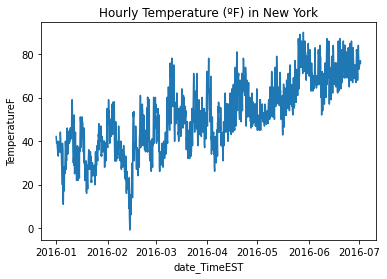

In [13]:
# How temperature changes over time
# Seaborn lineplots
sns.lineplot(x = "date_TimeEST", y = "TemperatureF",
            data = weather).set_title("Hourly Temperature (ºF) in New York")

Text(0.5, 1.0, 'Hourly Dew Point (ºF) in New York')

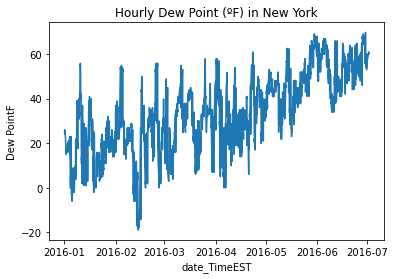

In [12]:
# dew point
sns.lineplot(x = "date_TimeEST", y = "Dew PointF",
            data = weather).set_title("Hourly Dew Point (ºF) in New York")

Text(0.5, 1.0, 'Hourly Humidity (%) in New York')

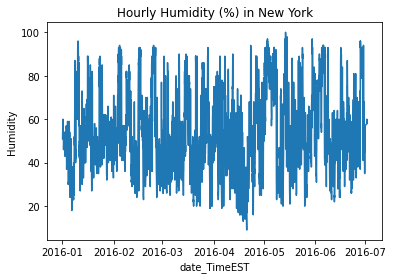

In [14]:
# humidity
sns.lineplot(x = "date_TimeEST", y = "Humidity",
            data = weather).set_title("Hourly Humidity (%) in New York")

C:\Users\richa\AppData\Local\Temp/ipykernel_21972/4027660127.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


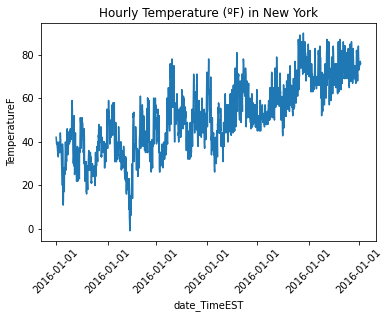

In [11]:
# format dates
fig, ax = plt.subplots()

sns.lineplot(x = "date_TimeEST", y = "TemperatureF",
             data = weather).set_title("Hourly Temperature (ºF) in New York")

x_labels = weather["date_TimeEST"].dt.strftime("%Y-%m-%d")

ax.set_xticklabels(x_labels, rotation = 45)

plt.show()

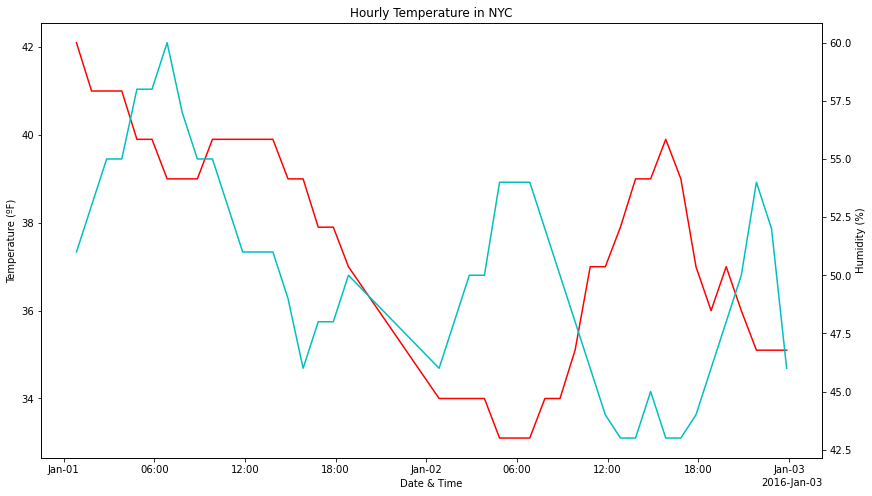

In [15]:
# plotting different variables
january_data = weather[weather.date_TimeEST < np.datetime64('2016-01-03')]

fig, temp_ax = plt.subplots()
fig.set_size_inches(14, 8)

humidity_ax = temp_ax.twinx()

# add labels
temp_ax.set_title("Hourly Temperature in NYC")
temp_ax.set_xlabel("Date & Time")
temp_ax.set_ylabel("Temperature (ºF)")

humidity_ax.set_ylabel("Humidity (%)")

# change date and time
major_locator = AutoDateLocator()
formatter = ConciseDateFormatter(major_locator)
humidity_ax.xaxis.set_major_formatter(formatter)
temp_ax.xaxis.set_major_formatter(formatter)

temp_lines = temp_ax.plot(january_data.date_TimeEST, january_data.TemperatureF, 'r')
humidity_lines = humidity_ax.plot(january_data.date_TimeEST, january_data.Humidity, 'c')

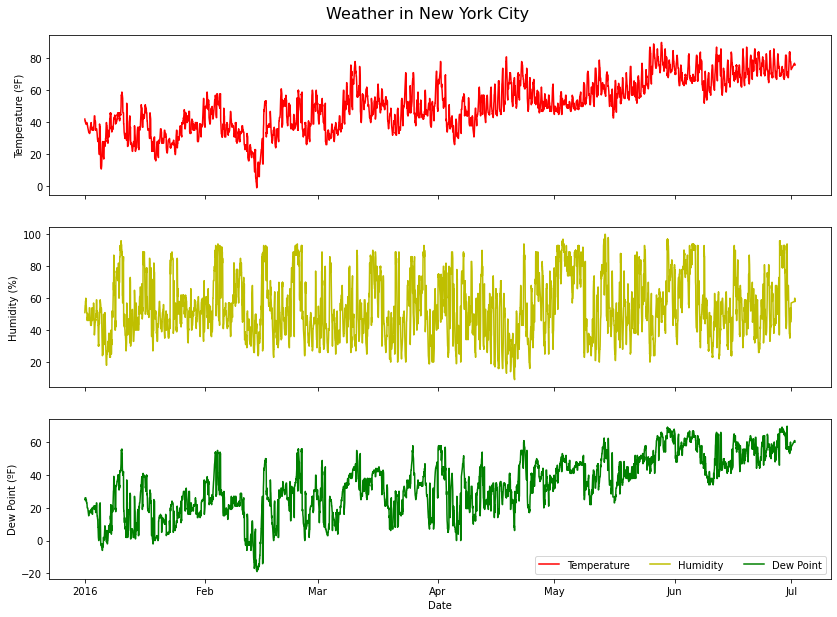

In [19]:
# plot multiple variables with the same x-axis
fig, axes = plt.subplots(nrows = 3)
nyc_fig = fig
fig.set_size_inches(14, 10)

temp_lines = axes[0].plot(weather.date_TimeEST, weather.TemperatureF, "r")
humidity_lines = axes[1].plot(weather.date_TimeEST, weather.Humidity, "y")
dew_point_lines = axes[2].plot(weather.date_TimeEST, weather["Dew PointF"], "g")

axes[0].set_xticklabels([])
axes[1].set_xticklabels([])

major_locator = AutoDateLocator()
formatter = ConciseDateFormatter(major_locator)
axes[2].xaxis.set_major_formatter(formatter)
axes[0].set_ylabel("Temperature (ºF)")
axes[1].set_ylabel("Humidity (%)")
axes[2].set_ylabel("Dew Point (ºF)")
axes[2].set_xlabel("Date")
fig.suptitle("Weather in New York City", fontsize = 16, y = 0.92)
axes[2].legend(temp_lines + humidity_lines + dew_point_lines, 
              ["Temperature", "Humidity", "Dew Point"],
               loc = "lower right", ncol = 3)

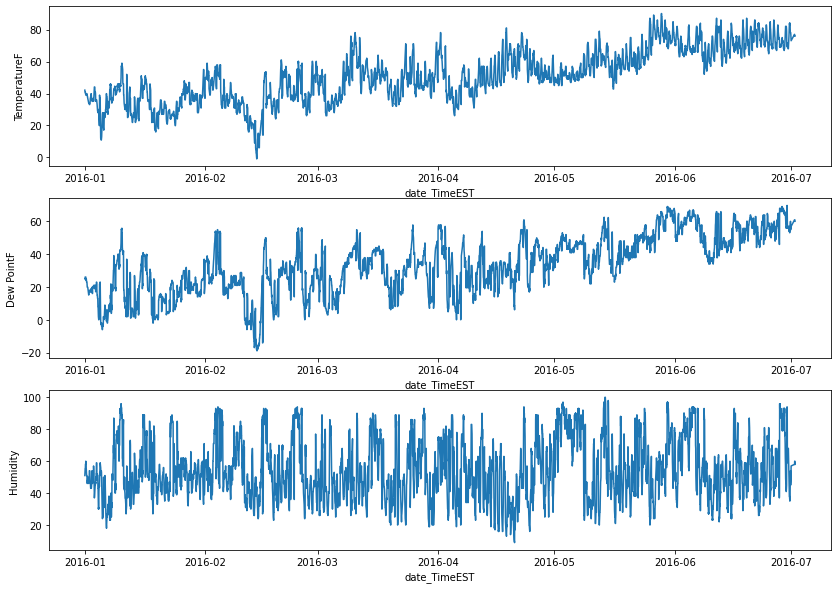

In [22]:
# alternative methods
fig, ax = plt.subplots(3)
fig.set_size_inches(14, 10)

sns.lineplot(x = "date_TimeEST", y = "TemperatureF", ax = ax[0], data = weather)
sns.lineplot(x = "date_TimeEST", y = "Dew PointF", ax = ax[1], data = weather)
sns.lineplot(x = "date_TimeEST", y = "Humidity", ax = ax[2], data = weather)

plt.show()